# Calculating the Energy of a Quantum Harmonic Oscillator using computational calculus

A quantum harmonic oscillators total energy can be found as
$$E_\psi=\frac{\int \psi^*(x)\hat{H}\psi(x)dx}{\int \psi^*(x)\psi(x) dx}$$
The denominator becomes 1 if the wave function is correctly normalised, and so can be ignored.
$\hat{H}$ is the Hamiltonian, which can be seperated into the Kinetic and Potential energy operators:
$$\hat{H}=\hat{T}+\hat{V}=-\frac{1}{2}\frac{d^2}{dx^2} + \frac{1}{2}kx^2$$

The wave function for our quantum harmnoic oscillator takes the form
$$\psi(x)=\left(\frac{2\alpha}{\pi}\right)^{1/4}e^{-\alpha x^2}$$
We should create a function that finds the wave function at a given point for a given alpha

In [1]:
#Collect imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def WaveFunction(x,alpha=1):
    """
    Finds the wave function at a given point for a given alpha
    Inputs:
        x - The point on the wave function we wish to evaluate
        alpha - The value of alpha the wave function should evaluate for
            By default alpha=1
    """
    return ((2*alpha/np.pi)**0.25)*np.exp(-alpha*(x**2))

As we wish to find the energy of the wave function, we need to evaluate over the whole range of the wave function. That is $-\infty<x<\infty$. Computationally it is impossible to work over these bounds. Instead, we see that at a value of $x=\pm 5$ for $\alpha=1$ our wave function evaluates to $1.24\times10^{-11}$ and so for our case is good enough. We can create a numpy array to hold these x values. We must however also decide the seperation needed between each x point. 
To decide this value, we can look at how accurately the scipy.integrae.simps function finds the value of a known integral.

In [2]:

for i in range(8):
    #Define the seperation as e^-i
    seperation = (1e-1)**i
    #Create x array from 0 to 2pi inclusive with the given seperation
    x = np.arange(0, 2*np.pi + seperation, seperation)
    #Find sine function over our x range, and then integrate
    y = np.sin(x)
    integral = integrate.simps(y,x)
    print("For a seperation of ",seperation," sin(x) from 0->2pi evaluates to", integral)


For a seperation of  1.0  sin(x) from 0->2pi evaluates to 0.21732852487369606
For a seperation of  0.1  sin(x) from 0->2pi evaluates to 0.0001406634051408658
For a seperation of  0.010000000000000002  sin(x) from 0->2pi evaluates to 2.3219645312204608e-05
For a seperation of  0.0010000000000000002  sin(x) from 0->2pi evaluates to 3.31862177516129e-07
For a seperation of  0.00010000000000000002  sin(x) from 0->2pi evaluates to 1.0793965721234144e-10
For a seperation of  1.0000000000000003e-05  sin(x) from 0->2pi evaluates to 1.101116658135122e-11
For a seperation of  1.0000000000000004e-06  sin(x) from 0->2pi evaluates to 2.4022404616734494e-13
For a seperation of  1.0000000000000004e-07  sin(x) from 0->2pi evaluates to 8.389029979716115e-15


Clearly, the integral
$$\int_0^{2\pi}sin(x) dx = 0$$
Looking at the output from the above code cell, we can see that (as expected) a smaller seperation results in significantly better results. We shall choose a seperation of 0.001 as this gives accuracy to $\pm10^{-7}$. This seperation value is also suitably small enough to use as our finite difference when differentiating
We can now define our function to find the second order differential of our wave function.

<IPython.core.display.Javascript object>


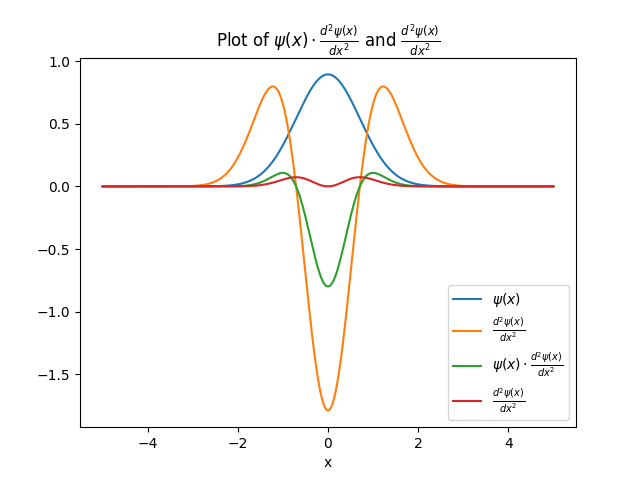

[]

In [3]:
def SecondOrderDifferentiate(function, x, dx, alpha=1):
    """
    Find the second order differential of the given function 
        evaluated at the point x
    Inputs:
        function - The function we wish to find the second order 
            differential of
        x - The point at which we wish to evaluate the function
        dx - The finite difference used to calculate the differential
        alpha - 1 By default, passed to the wave function.
    """
    return (function(x+dx,alpha)-2*function(x,alpha)+function(x-dx,alpha))/(dx**2)

#Define the seperation, then initiate all arrays
dx = 0.001
x = np.arange(-5,5+dx,dx)
psiX = WaveFunction(x)
d2PsiX = SecondOrderDifferentiate(WaveFunction, x, dx)
#Plot data
plt.plot(x,psiX, label=r"$\psi(x)$")
plt.plot(x,d2PsiX, label=r"$\frac{d^2\psi(x)}{dx^2}$")
plt.legend(loc='lower right')
plt.title(r"Plot of $\psi(x)$ and $\frac{d^2\psi(x)}{dx^2}$")
plt.xlabel('x')
plt.plot()

Now that we have a function to find our wave function and its second order differential, we can attempt to find the kinetic and potential energy of the wave function.
By looking at the original equations for $E_\psi(x)$ and $\hat{H}$ we can see that the kinetic and potential energy can be found by:
$$E_{KE}=-\frac{1}{2}\int \psi(x)\frac{d^2\psi}{dx^2} dx$$
$$E_{PE}=\frac{1}{2}\int \psi(x)x^2\psi(x) dx$$
Let create an array to hold the values within the two above integrals

In [4]:
psi_d2Psi = 0.5*psiX * d2PsiX
psi_sqr_x_sqr = 0.5 *psiX*psiX*(x**2)

plt.plot(x,psi_d2Psi, label=r"$\psi(x)\cdot\frac{d^2\psi(x)}{dx^2}$")
plt.plot(x,psi_sqr_x_sqr, label=r"$\frac{d^2\psi(x)}{dx^2}$")
plt.legend(loc='lower right')
plt.title(r"Plot of $\psi(x)\cdot\frac{d^2\psi(x)}{dx^2}$ and $\frac{d^2\psi(x)}{dx^2}$")
plt.xlabel('x')
plt.show()

We can now attempt to evaluate our kinetic and potential energy by integrating over the whole wave function. We shall do this using simpsons rule via scipy.integrate.simps

In [5]:
#Calculate energys
energy_kinetic = -integrate.simps(psi_d2Psi, x)
energy_potential = integrate.simps(psi_sqr_x_sqr, x)
total_energy=energy_kinetic+energy_potential
#Print data
print("Wave function has a total energy of",total_energy, "with",energy_kinetic,
      "kinetic energy and",energy_potential,"potential energy")


Wave function has a total energy of 0.6249998749999041 with 0.49999987499990406 kinetic energy and 0.125 potential energy


These solutions appear to show a total energy of 0.625, split between 0.5 kinetic energy and 0.125 potential energy.
To test the accuracy of this method, we can compare our result to the one seen in our week 2 assignment.
In this assignment, we were given that the energy for the ground state could be found by:
$$E_{GS} = \frac{\alpha}{2} + \frac{1}{8\alpha}$$
We were then able to find that the energy for the ground state occured at $\alpha=0.5$ with a ground state energy of $0.5$.
By re-calculating the energy of our wave function but with an $\alpha$ of $0.5$ we can check that the methods used in this assignment have been implemented correctly.

In [6]:
#Calculate our wave function and its second order differential for alpha=0.5
psiX_alpha0_5 = WaveFunction(x, alpha=0.5)
d2PsiX_alpha0_5 = SecondOrderDifferentiate(WaveFunction, x, dx, alpha=0.5)
#Calculate the pre-integral terms for kinetic and potential energy
psi_d2Psi_alpha0_5 = 0.5*psiX_alpha0_5 * d2PsiX_alpha0_5
psi_sqr_x_sqr_alpha0_5 = 0.5 *psiX_alpha0_5*psiX_alpha0_5*(x**2)

#Calculate energy
energy_kinetic_alpha0_5 = -integrate.simps(psi_d2Psi_alpha0_5, x)
energy_potential_alpha0_5 = integrate.simps(psi_sqr_x_sqr_alpha0_5, x)
total_energy_alpha0_5=energy_kinetic_alpha0_5+energy_potential_alpha0_5
print("Wave function with alpha=0.5 has a total energy of",total_energy_alpha0_5, "with",energy_kinetic_alpha0_5,
      "kinetic energy and",energy_potential_alpha0_5,"potential energy")

Wave function with alpha=0.5 has a total energy of 0.4999999687490814 with 0.24999996876895683 kinetic energy and 0.2499999999801246 potential energy


With this method we have aquired a value equivilent to what we expect, proving the validity of the methods used as well as the implimentation of them.
Our results also appear to have a high level of accuracy with our calculated energy levels having an accuracy of $\pm10^{-7}$ or greated by looking at the above calculated energy.
However, this method does seem to be quite computationally intensive, with the 3rd code cell (calculation and plotting of the wave function and its second order differential, plus their plots) takes several seconds to run.
This may be due to too high a resolution for our wave function array, which has 10,002 elements in it.
Overall, the accuracy of the finite difference method of differentiation is surprising for a relativly large value of dx, especially when calcualting a second order differential.